In [ ]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
from IPython.display import Image
from six import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import linear_model,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import arange

# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Import Drive API and authenticate.
#from google.colab import drive

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# Data Import

In [ ]:
file = pd.read_csv('peru_matlab_export_full.csv')
train_set = file.loc[file['training']==1]
test_set = file.loc[file['training']==0]

In [ ]:
train_set.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
23152,5.304770,0,1,0,0,0,0,0,0,0,...,0,0,1,201.2948,1,2,23153,278906011,5.756313,443.7744
23153,7.179197,0,0,0,0,1,0,0,0,0,...,1,0,1,1311.8550,0,3,23154,42105011,6.600141,814.9922
23154,5.546008,0,1,0,0,0,0,0,0,0,...,0,0,1,256.2126,0,2,23155,133206411,5.270788,202.6347
23155,5.321395,0,1,0,0,0,0,0,0,1,...,0,0,1,204.6692,1,7,23156,162703311,5.130516,127.6580
23156,5.347988,1,0,0,0,0,0,0,0,0,...,0,0,1,210.1850,0,4,23157,85709411,5.013036,143.4782


In [ ]:
test_set.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,5.351858,0,1,0,0,0,0,0,0,1,...,0,0,0,211.0000,0,1,1,233710511,5.246471,284.4243
1,5.768755,0,0,0,0,1,0,0,0,0,...,0,0,0,320.1389,0,3,2,295508011,6.129468,522.8840
2,5.968277,0,0,0,0,1,0,0,0,0,...,0,0,0,390.8318,0,4,3,257600211,6.665577,878.4961
3,5.654599,0,0,0,0,1,0,0,0,0,...,0,0,0,285.6018,1,9,4,198104311,6.088295,567.4705
4,4.771289,0,1,0,0,0,0,0,0,1,...,0,0,0,118.0713,1,8,5,24805311,5.008170,115.4929


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23153 entries, 23152 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23153 non-null  float64
 1   d_fuel_other             23153 non-null  int64  
 2   d_fuel_wood              23153 non-null  int64  
 3   d_fuel_coal              23153 non-null  int64  
 4   d_fuel_kerosene          23153 non-null  int64  
 5   d_fuel_gas               23153 non-null  int64  
 6   d_fuel_electric          23153 non-null  int64  
 7   d_fuel_none              23153 non-null  int64  
 8   d_water_other            23153 non-null  int64  
 9   d_water_river            23153 non-null  int64  
 10  d_water_well             23153 non-null  int64  
 11  d_water_truck            23153 non-null  int64  
 12  d_water_pylon            23153 non-null  int64  
 13  d_water_outside          23153 non-null  int64  
 14  d_water_inside    

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23152 entries, 0 to 23151
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23152 non-null  float64
 1   d_fuel_other             23152 non-null  int64  
 2   d_fuel_wood              23152 non-null  int64  
 3   d_fuel_coal              23152 non-null  int64  
 4   d_fuel_kerosene          23152 non-null  int64  
 5   d_fuel_gas               23152 non-null  int64  
 6   d_fuel_electric          23152 non-null  int64  
 7   d_fuel_none              23152 non-null  int64  
 8   d_water_other            23152 non-null  int64  
 9   d_water_river            23152 non-null  int64  
 10  d_water_well             23152 non-null  int64  
 11  d_water_truck            23152 non-null  int64  
 12  d_water_pylon            23152 non-null  int64  
 13  d_water_outside          23152 non-null  int64  
 14  d_water_inside        

According to their information, I decide to delete all the rows which contain missing values, because I think if there are missing values in $X$(feature matrix), it will influence on the $W$ and if there are missing values in $y$, it will influence on the MSE

In [ ]:
# Creating subset without the dependent variable
subset_train = train_set.columns[1:72]
subset_test = test_set.columns[1:72]

# Drop whole column if Nan in subset
train_set = train_set.dropna(subset=subset_train, how='any')
test_set = test_set.dropna(subset=subset_test, how='any')

Check if each variable has the same number of columns after droping the Nan in the subset.

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22674 entries, 23152 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   22674 non-null  float64
 1   d_fuel_other             22674 non-null  int64  
 2   d_fuel_wood              22674 non-null  int64  
 3   d_fuel_coal              22674 non-null  int64  
 4   d_fuel_kerosene          22674 non-null  int64  
 5   d_fuel_gas               22674 non-null  int64  
 6   d_fuel_electric          22674 non-null  int64  
 7   d_fuel_none              22674 non-null  int64  
 8   d_water_other            22674 non-null  int64  
 9   d_water_river            22674 non-null  int64  
 10  d_water_well             22674 non-null  int64  
 11  d_water_truck            22674 non-null  int64  
 12  d_water_pylon            22674 non-null  int64  
 13  d_water_outside          22674 non-null  int64  
 14  d_water_inside    

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22704 entries, 0 to 23151
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   22704 non-null  float64
 1   d_fuel_other             22704 non-null  int64  
 2   d_fuel_wood              22704 non-null  int64  
 3   d_fuel_coal              22704 non-null  int64  
 4   d_fuel_kerosene          22704 non-null  int64  
 5   d_fuel_gas               22704 non-null  int64  
 6   d_fuel_electric          22704 non-null  int64  
 7   d_fuel_none              22704 non-null  int64  
 8   d_water_other            22704 non-null  int64  
 9   d_water_river            22704 non-null  int64  
 10  d_water_well             22704 non-null  int64  
 11  d_water_truck            22704 non-null  int64  
 12  d_water_pylon            22704 non-null  int64  
 13  d_water_outside          22704 non-null  int64  
 14  d_water_inside        

Shape train features and test features according to Hanna & Olken (1 dependent variable, 72 independent variables)

In [ ]:
X_train = train_set.iloc[:, 1:72]
y_train = train_set.iloc[:, 0]

X_test = test_set.iloc[:, 1:72]
y_test = test_set.iloc[:, 79]

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

# **Lasso Approach**

According to the objective function, the goal of lasso is
$$
\min_{w} \sum_{i=1}^N (x_i*w-y_i)^2+\alpha * \sum_{i=1}^D |w_i|
$$
Here N is the number of samples, and D is the number of features.

As different $\alpha$ cause different, I use the 'Cross-Validation' method to find the best $\alpha$. Here $LassoCV()$ can help us find the best $\alpha$  with this method

In [ ]:
#Build the model and caculate the MSE
lasso=linear_model.LassoCV() #The parameter of the model is default, that is, alpha 5-fold cross-validation
lasso.fit(X_train, y_train)
y_prediction1 = lasso.predict(X_test)
MSE1 = metrics.mean_squared_error(y_test, y_prediction1)
print('The MSE is:')
print(MSE1)

The MSE is:
0.00020476346601446633


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


# Mount your Drive to the Colab VM.
#drive.mount('/gdrive')
#df.to_csv('lassoprediction.csv')
#!cp data.csv "content/drive/

Here's the parameter of the model:

In [ ]:
print('Selected coefficients:')
print(pd.Series(lasso.coef_, index=train_set.iloc[:, 1:72].columns))

Selected coefficients:
d_fuel_other      -0.261402
d_fuel_wood       -0.198090
d_fuel_coal       -0.000000
d_fuel_kerosene   -0.000000
d_fuel_gas         0.051690
                     ...   
d_lux_0           -0.535013
d_lux_1           -0.372393
d_lux_2           -0.286941
d_lux_3           -0.201528
d_lux_4           -0.109908
Length: 71, dtype: float64


In [ ]:
print('The alpha is:')
print(lasso.alpha_)

The alpha is:
0.00021528658199261529


Here's the relationship between MSE and $\alpha$ during the training. It shows that the $\alpha$ is smaller, the outcome of the model is better. So I think it's better to use linear model to predict. 

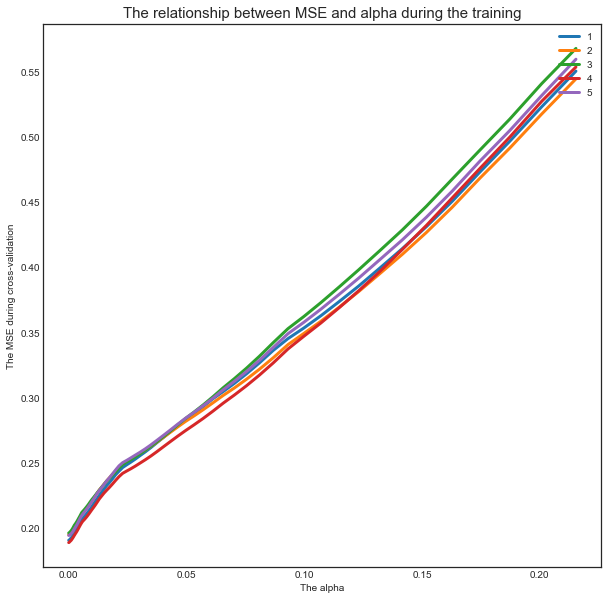

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('The alpha', fontsize=10)
ax.set_ylabel('The MSE during cross-validation', fontsize=10)
plt.plot(lasso.alphas_,lasso.mse_path_[:,0],label='1')
plt.plot(lasso.alphas_,lasso.mse_path_[:,1],label='2')
plt.plot(lasso.alphas_,lasso.mse_path_[:,2],label='3')
plt.plot(lasso.alphas_,lasso.mse_path_[:,3],label='4')
plt.plot(lasso.alphas_,lasso.mse_path_[:,4],label='5')
ax.legend(loc='upper right', fontsize=10)
ax.set_title('The relationship between MSE and alpha during the training', fontsize=15)
plt.show()

I'm not sure whether the conclusion is right.....

## Replicating Figure 5 

Recall prediction1 from Lasso

In [ ]:
y_prediction1

array([5.26109984, 6.13048498, 6.67161277, ..., 5.21662826, 6.92885132,
       5.94699443])

Put prediction 1 to full test set (includes all variables, hence not shaped)

In [ ]:
test_set_1 = test_set.copy()
test_set_1['y_prediction1'] = y_prediction1

test_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22704 entries, 0 to 23151
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   22704 non-null  float64
 1   d_fuel_other             22704 non-null  int64  
 2   d_fuel_wood              22704 non-null  int64  
 3   d_fuel_coal              22704 non-null  int64  
 4   d_fuel_kerosene          22704 non-null  int64  
 5   d_fuel_gas               22704 non-null  int64  
 6   d_fuel_electric          22704 non-null  int64  
 7   d_fuel_none              22704 non-null  int64  
 8   d_water_other            22704 non-null  int64  
 9   d_water_river            22704 non-null  int64  
 10  d_water_well             22704 non-null  int64  
 11  d_water_truck            22704 non-null  int64  
 12  d_water_pylon            22704 non-null  int64  
 13  d_water_outside          22704 non-null  int64  
 14  d_water_inside        

In [ ]:
#following Hanna and Olken, we need to first create 101 different cutoff values corresponding to %iles of lncaphat
#c_0 = 0
#for number in range(1,100,1):
  # c_'number'=numpy.percentile(ages, number)

#Random Forest Approach

In [ ]:
#Random Forest Prediction
k=len(X_train[0])
random_forest_consumption = RandomForestRegressor(n_estimators = k, oob_score=True, max_features="sqrt" )

random_forest_consumption.fit(X_train, y_train)
y_prediction2 = random_forest_consumption.predict(X_test)

MSE2 = metrics.mean_squared_error(y_test, y_prediction2)
print('The MSE is:')
print(MSE2)

The MSE is:
0.04183479728780302


##Feature Importance Plot

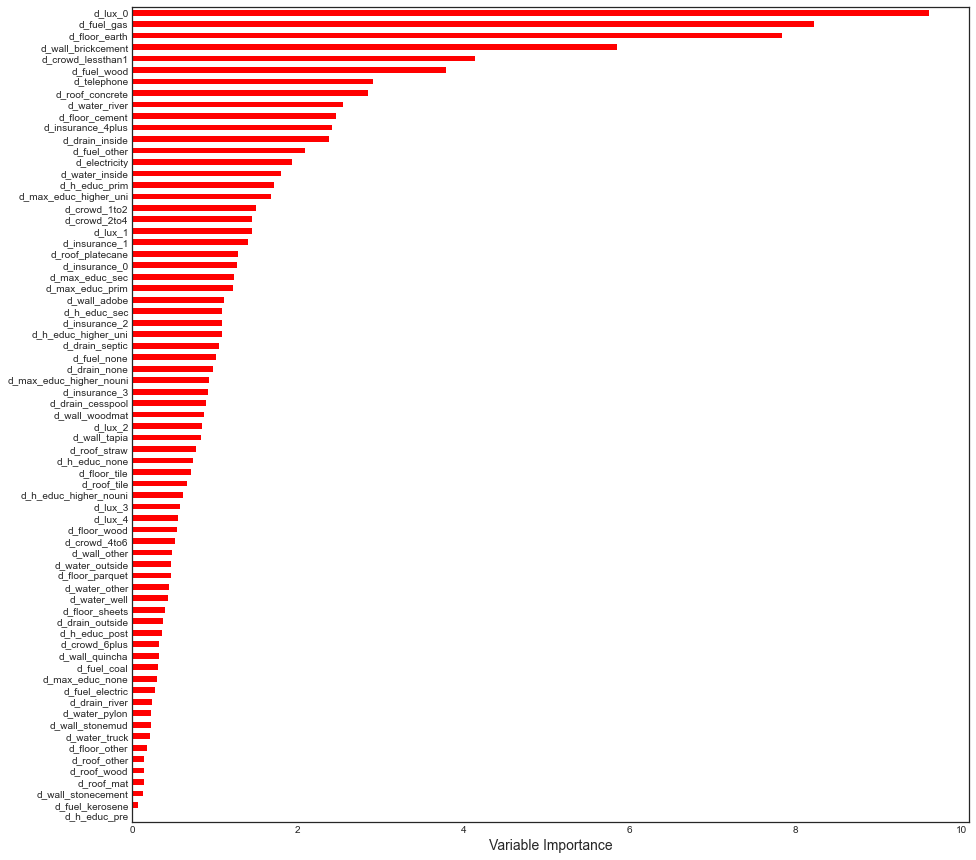

In [ ]:
Importance = pd.DataFrame({'Importance':random_forest_consumption.feature_importances_*100}, 
                          index = test_set.iloc[:, 1:72].columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              figsize=(15,15),
                                              color = 'r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Up next:

*   Calculate Inclusion / Exclusion Error
*   Replicate Figure 5




Firstly add the predicted values into a new dataframe

In [ ]:
test_set_1 = test_set.copy()
test_set_1['y_prediction1'] = y_prediction1
test_set_1['y_prediction_random forest'] = y_prediction2
y_training_test_lasso=lasso.predict(X_train)
y_training_test_random_forest=random_forest_consumption.predict(X_train)
train_set_1 = train_set.copy()# I noticed that we may need the predicting value of the training data, so I add this
train_set_1['y_prediction1'] = y_training_test_lasso
train_set_1['y_prediction_random forest'] = y_training_test_random_forest
outcome=test_set_1.append(train_set_1)

In [ ]:
outcome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45378 entries, 0 to 46304
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lnpercapitaconsumption      45378 non-null  float64
 1   d_fuel_other                45378 non-null  int64  
 2   d_fuel_wood                 45378 non-null  int64  
 3   d_fuel_coal                 45378 non-null  int64  
 4   d_fuel_kerosene             45378 non-null  int64  
 5   d_fuel_gas                  45378 non-null  int64  
 6   d_fuel_electric             45378 non-null  int64  
 7   d_fuel_none                 45378 non-null  int64  
 8   d_water_other               45378 non-null  int64  
 9   d_water_river               45378 non-null  int64  
 10  d_water_well                45378 non-null  int64  
 11  d_water_truck               45378 non-null  int64  
 12  d_water_pylon               45378 non-null  int64  
 13  d_water_outside             453

Extract the values and define parameters

In [ ]:
lncaphat_lasso = outcome['y_prediction1'].values;
lncaphat_random_forest = outcome['y_prediction_random forest'].values;
poor = outcome['poor'].values;
training = outcome['training'].values;
h_hhsize = outcome['h_hhsize'].values;
percapitaconsumption = outcome['percapitaconsumption'].values;

In [ ]:
samplesize=sum(training==1)
CRRA_lasso_training = np.zeros(100)
inc_error_lasso_training= np.zeros(100)
CRRA_random_forest_training = np.zeros(100)
inc_error_random_forest_training= np.zeros(100)
bonus_perhh = 2.235/12
national_num_households = 6750000
program_budget_monthly = 880000000/12

Here's the translation of professor's code

In [ ]:
for i in range(100):
    c_lasso = np.percentile(lncaphat_lasso[training ==1], (i+1))
    incl_c_lasso = lncaphat_lasso < c_lasso
    
    c_random_forest = np.percentile(lncaphat_random_forest[training ==1], (i+1))
    incl_c_random_forest = lncaphat_random_forest < c_random_forest
    
    incl_c_lasso = incl_c_lasso+0
    incl_c_random_forest = incl_c_random_forest+0
    
    num_incl_lasso = incl_c_lasso.T*h_hhsize
    num_incl_random_forest = incl_c_random_forest.T*h_hhsize
    
    incl_error_normal_lasso=np.zeros(incl_c_lasso.shape[0])
    incl_error_normal_random_forest=np.zeros(incl_c_random_forest.shape[0])
    
    for j in range(incl_c_lasso.shape[0]):
        if incl_c_lasso[j] ==1 and poor[j] ==0:
            incl_error_normal_lasso[j]=1
    for j in range(incl_c_random_forest.shape[0]):
        if incl_c_random_forest[j] ==1 and poor[j] ==0:
            incl_error_normal_random_forest[j]=1
    
    households_incl_lasso = sum(incl_c_lasso[training==1])
    households_incl_random_forest = sum(incl_c_random_forest[training==1])
    
    pct_households_incl_lasso = households_incl_lasso / samplesize
    pct_households_incl_random_forest = households_incl_random_forest / samplesize
    
    national_hh_incl_lasso =  national_num_households*pct_households_incl_lasso
    national_hh_incl_random_forest =  national_num_households*pct_households_incl_random_forest
    
    per_hh_benefits_lasso = program_budget_monthly/national_hh_incl_lasso
    per_hh_benefits_random_forest = program_budget_monthly/national_hh_incl_random_forest
    
    benefits_received_lasso = incl_c_lasso * per_hh_benefits_lasso + bonus_perhh*(i+1==100)
    benefits_received_random_forest = incl_c_random_forest * per_hh_benefits_random_forest + bonus_perhh*(i+1==100)
    
    percapita_benefits_received_lasso  = np.divide(benefits_received_lasso,h_hhsize)
    percapita_benefits_received_random_forest  = np.divide(benefits_received_random_forest,h_hhsize)
    
    income_lasso = percapitaconsumption + percapita_benefits_received_lasso
    income_random_forest = percapitaconsumption + percapita_benefits_received_random_forest

    CRRA_lasso_training[i] = sum((income_lasso[training==1])**(-2)/(-2))
    CRRA_random_forest_training[i] = sum((income_random_forest[training==1])**(-2)/(-2))
    
    inc_error_lasso_training[i] = sum(incl_error_normal_lasso[training==1])/sum(1-poor[training==1])
    inc_error_random_forest_training[i] = sum(incl_error_normal_random_forest[training==1])/sum(1-poor[training==1])

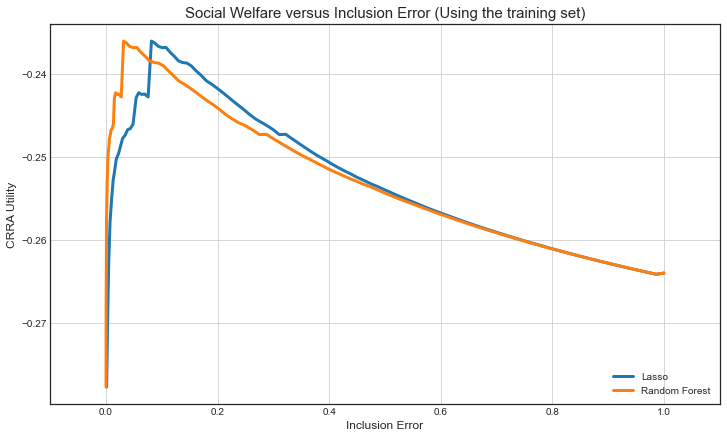

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.set_xlabel('Inclusion Error', fontsize=12)
ax1.set_ylabel('CRRA Utility', fontsize=12)
ax1.set_title('Social Welfare versus Inclusion Error (Using the training set)', fontsize=15)
plt.plot(inc_error_lasso_training,CRRA_lasso_training,label='Lasso')
plt.plot(inc_error_random_forest_training,CRRA_lasso_training,label='Random Forest')
plt.xlim((-0.1,1.1))
plt.grid()
ax1.legend(loc='lower right', fontsize=10)
plt.savefig('Figure 5(Using the training set).jpg')

I add a figure using the testing dataset(training ==0-->training ==1), I'm not sure whether it's useful

In [ ]:
samplesize=sum(training==1)
CRRA_lasso_testing = np.zeros(100)
inc_error_lasso_testing= np.zeros(100)
CRRA_random_forest_testing = np.zeros(100)
inc_error_random_forest_testing= np.zeros(100)
bonus_perhh = 2.235/12
national_num_households = 6750000
program_budget_monthly = 880000000/12

In [ ]:
for i in range(100):
    c_lasso = np.percentile(lncaphat_lasso[training ==0], (i+1))
    incl_c_lasso = lncaphat_lasso < c_lasso
    
    c_random_forest = np.percentile(lncaphat_random_forest[training ==0], (i+1))
    incl_c_random_forest = lncaphat_random_forest < c_random_forest
    
    incl_c_lasso = incl_c_lasso+0
    incl_c_random_forest = incl_c_random_forest+0
    
    num_incl_lasso = incl_c_lasso.T*h_hhsize
    num_incl_random_forest = incl_c_random_forest.T*h_hhsize
    
    incl_error_normal_lasso=np.zeros(incl_c_lasso.shape[0])
    incl_error_normal_random_forest=np.zeros(incl_c_random_forest.shape[0])
    
    for j in range(incl_c_lasso.shape[0]):
        if incl_c_lasso[j] ==1 and poor[j] ==0:
            incl_error_normal_lasso[j]=1
    for j in range(incl_c_random_forest.shape[0]):
        if incl_c_random_forest[j] ==1 and poor[j] ==0:
            incl_error_normal_random_forest[j]=1
    
    households_incl_lasso = sum(incl_c_lasso[training==0])
    households_incl_random_forest = sum(incl_c_random_forest[training==0])
    
    pct_households_incl_lasso = households_incl_lasso / samplesize
    pct_households_incl_random_forest = households_incl_random_forest / samplesize
    
    national_hh_incl_lasso =  national_num_households*pct_households_incl_lasso
    national_hh_incl_random_forest =  national_num_households*pct_households_incl_random_forest
    
    per_hh_benefits_lasso = program_budget_monthly/national_hh_incl_lasso
    per_hh_benefits_random_forest = program_budget_monthly/national_hh_incl_random_forest
    
    benefits_received_lasso = incl_c_lasso * per_hh_benefits_lasso + bonus_perhh*(i+1==100)
    benefits_received_random_forest = incl_c_random_forest * per_hh_benefits_random_forest + bonus_perhh*(i+1==100)
    
    percapita_benefits_received_lasso  = np.divide(benefits_received_lasso,h_hhsize)
    percapita_benefits_received_random_forest  = np.divide(benefits_received_random_forest,h_hhsize)
    
    income_lasso = percapitaconsumption + percapita_benefits_received_lasso
    income_random_forest = percapitaconsumption + percapita_benefits_received_random_forest

    CRRA_lasso_testing[i] = sum((income_lasso[training==0])**(-2)/(-2))
    CRRA_random_forest_testing[i] = sum((income_random_forest[training==0])**(-2)/(-2))
    
    inc_error_lasso_testing[i] = sum(incl_error_normal_lasso[training==0])/sum(1-poor[training==0])
    inc_error_random_forest_testing[i] = sum(incl_error_normal_random_forest[training==0])/sum(1-poor[training==0])

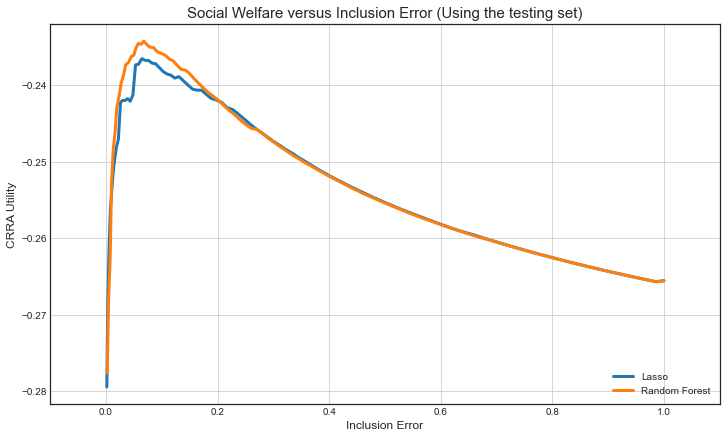

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_xlabel('Inclusion Error', fontsize=12)
ax2.set_ylabel('CRRA Utility', fontsize=12)
ax2.set_title('Social Welfare versus Inclusion Error (Using the testing set)', fontsize=15)
plt.plot(inc_error_lasso_testing,CRRA_lasso_testing,label='Lasso')
plt.plot(inc_error_random_forest_testing,CRRA_random_forest_testing,label='Random Forest')
plt.xlim((-0.1,1.1))
ax2.legend(loc='lower right', fontsize=10)
plt.grid()
plt.savefig('Figure 5(Using the testing set).jpg')